# 🦠 COVID-19 Global Data Analysis - Portfolio Project
**Analysis of April 2020 COVID-19 Data**

This notebook includes data loading, cleansing, feature engineering, EDA, visualization, and business insights generation for COVID-19 global data as of April 2020.

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
from datetime import datetime

# Set visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette('viridis')
%matplotlib inline
os.makedirs('visuals', exist_ok=True)

## 2. Data Loading & Initial Inspection

In [3]:
df = pd.read_csv('covid_19_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['State'] = df['State'].fillna('National')
print("DATA SHAPE:", df.shape)
display(df.head())

DATA SHAPE: (321, 6)


,Date,State,Region,Confirmed,Deaths,Recovered
0,2020-04-29,National,Afghanistan,1939,60,252
1,2020-04-29,National,Albania,766,30,455
2,2020-04-29,National,Algeria,3848,444,1702
3,2020-04-29,National,Andorra,743,42,423
4,2020-04-29,National,Angola,27,2,7


## 3. Data Cleansing & Feature Engineering

In [5]:
df = df[df['Confirmed'] > 0]  # ⚠️ Only calculate if denominator > 0
df['Active_Cases'] = df['Confirmed'] - df['Deaths'] - df['Recovered']
df['Mortality_Rate'] = (df['Deaths'] / df['Confirmed']).round(4)
df['Recovery_Rate'] = (df['Recovered'] / df['Confirmed']).round(4)
display(df.describe())

,Date,Confirmed,Deaths,Recovered,Active_Cases,Mortality_Rate,Recovery_Rate
count,318,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,2020-04-29 00:00:00,10043.666667,715.839623,2615.320755,6712.506289,0.035851,0.389820
min,2020-04-29 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020-04-29 00:00:00,109.500000,2.000000,2.000000,23.500000,0.008000,0.022975
50%,2020-04-29 00:00:00,712.500000,12.500000,72.000000,282.500000,0.027750,0.296900
75%,2020-04-29 00:00:00,4843.250000,147.000000,576.000000,3479.500000,0.051675,0.705800
max,2020-04-29 00:00:00,299691.000000,27682.000000,132929.000000,276214.000000,0.230800,1.000000
std,NaN,32059.810491,3250.701664,12785.275206,22403.525539,0.038119,0.348132


## 4. Missing Values Analysis

In [6]:
df.isnull().sum()

Date              0
State             0
Region            0
Confirmed         0
Deaths            0
Recovered         0
Active_Cases      0
Mortality_Rate    0
Recovery_Rate     0
dtype: int64

## 5. Top 15 Most Affected Regions

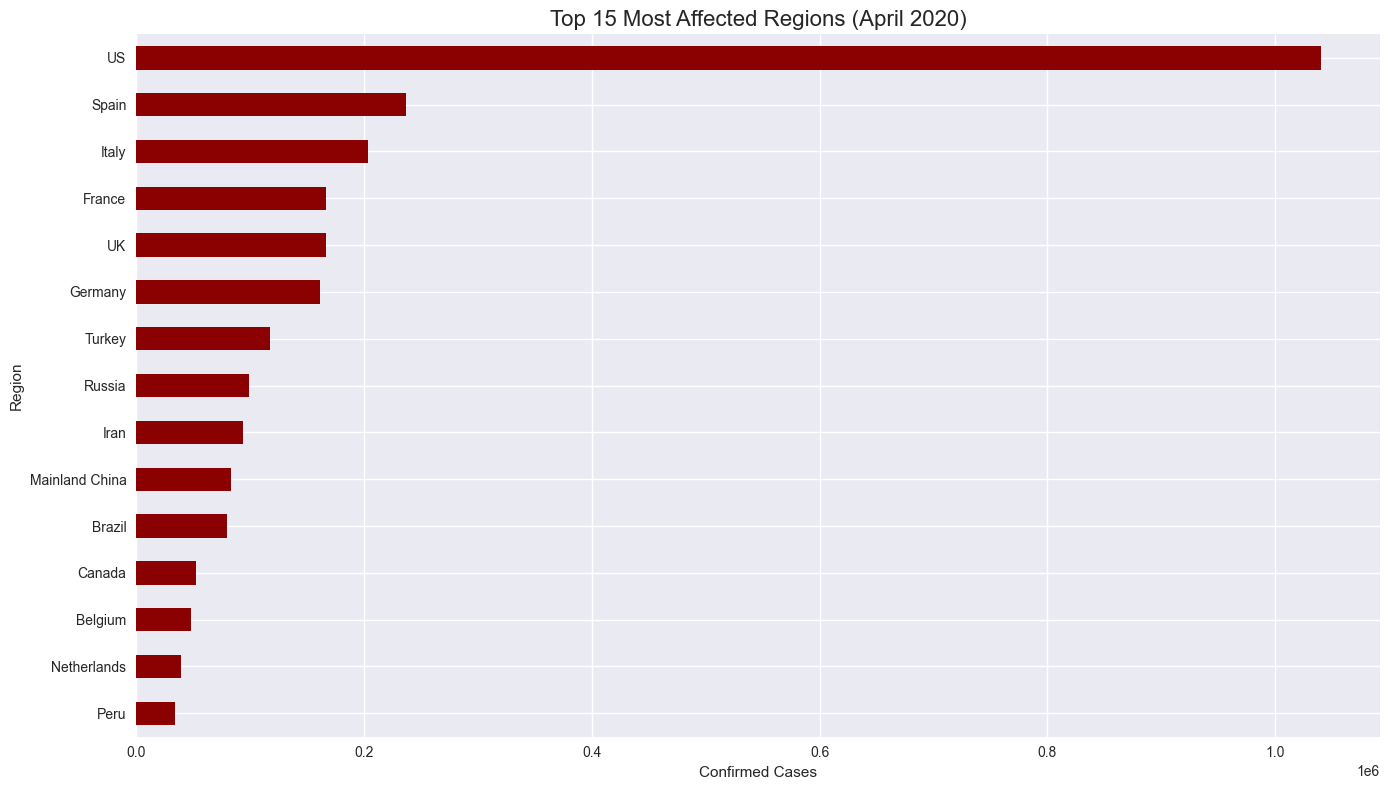

In [7]:
top_regions = df.groupby('Region')['Confirmed'].sum().nlargest(15)
plt.figure(figsize=(14, 8))
top_regions.sort_values().plot(kind='barh', color='darkred')
plt.title('Top 15 Most Affected Regions (April 2020)', fontsize=16)
plt.xlabel('Confirmed Cases')
plt.tight_layout()
plt.savefig('visuals/top_affected_regions.png', dpi=300)
plt.show()

## 6. Recovery vs Mortality Scatter

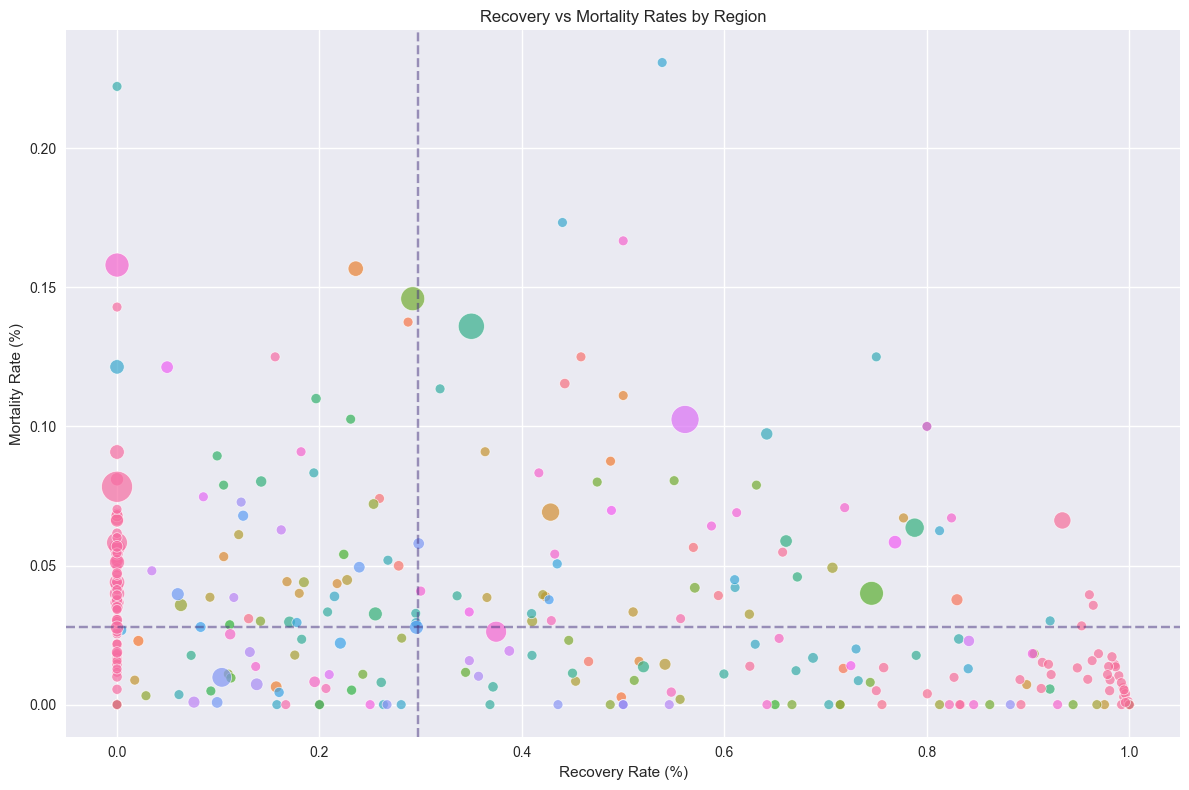

In [8]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Recovery_Rate', y='Mortality_Rate', 
                size='Confirmed', sizes=(50, 500),
                hue='Region', alpha=0.7, legend=False)
plt.title('Recovery vs Mortality Rates by Region')
plt.xlabel('Recovery Rate (%)')
plt.ylabel('Mortality Rate (%)')
plt.axhline(df['Mortality_Rate'].median(), linestyle='--', alpha=0.5)
plt.axvline(df['Recovery_Rate'].median(), linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('visuals/recovery_vs_mortality.png', dpi=300)
plt.show()

## 7. Interactive Plotly Bubble Chart

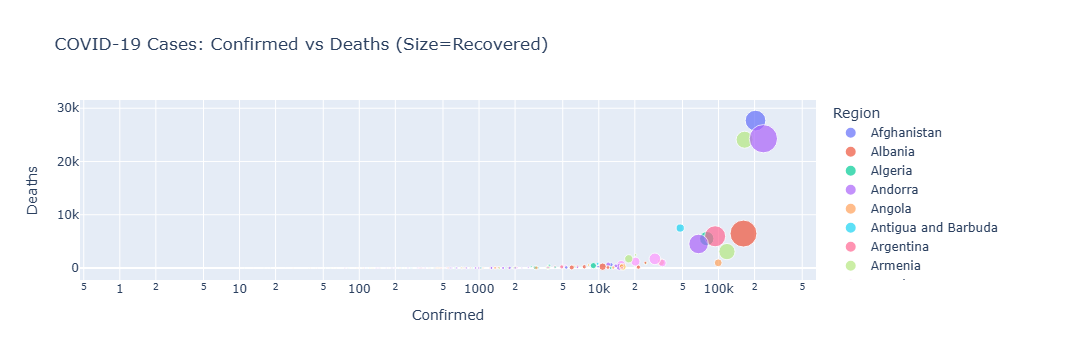

In [9]:
fig = px.scatter(df, x='Confirmed', y='Deaths', size='Recovered', 
                 color='Region', hover_name='Region', log_x=True,
                 title='COVID-19 Cases: Confirmed vs Deaths (Size=Recovered)')
fig.write_html('visuals/interactive_bubble_chart.html')
fig.show()

## 8. Key Questions Analysis

In [11]:
# Q1: Total by Region
df.groupby('Region')[['Confirmed', 'Deaths', 'Recovered']].sum().head(10)

,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702
Andorra,743,42,423
Angola,27,2,7
Antigua and Barbuda,24,3,11
Argentina,4285,214,1192
Armenia,1932,30,900
Australia,6752,91,5715


In [12]:
# Q2: Filter Confirmed >=10
filtered_df = df[df['Confirmed'] >= 10]
filtered_df.shape

(304, 9)

In [13]:
# Q3: Region with max confirmed
df.loc[df['Confirmed'].idxmax(), 'Region']

'US'

In [14]:
# Q4: Region with min deaths
df.loc[df['Deaths'].idxmin(), 'Region']

'Bhutan'

In [15]:
# Q5: India's April 29 Stats
india = df[(df['Region'] == 'India') & (df['Date'] <= '2020-04-29')]
india[['Confirmed', 'Deaths', 'Recovered']].sum()

Confirmed    33062
Deaths        1079
Recovered     8437
dtype: int64

In [17]:
# Q6: Sort
df.sort_values('Confirmed').head(10)

,Date,State,Region,Confirmed,Deaths,Recovered,Active_Cases,Mortality_Rate,Recovery_Rate
289,2020-04-29,Saint Pierre and Miquelon,France,1,0,0,1,0.0000,0.0000
305,2020-04-29,Tibet,Mainland China,1,0,1,0,0.0000,1.0000
184,2020-04-29,Anguilla,UK,3,0,3,0,0.0000,1.0000
192,2020-04-29,"Bonaire, Sint Eustatius and Saba",Netherlands,5,0,0,5,0.0000,0.0000
272,2020-04-29,Northwest Territories,Canada,5,0,0,5,0.0000,0.0000
288,2020-04-29,Saint Barthelemy,France,6,0,6,0,0.0000,1.0000
194,2020-04-29,British Virgin Islands,UK,6,1,3,2,0.1667,0.5000
178,2020-04-29,National,Yemen,6,0,1,5,0.0000,0.1667
177,2020-04-29,National,Western Sahara,6,0,5,1,0.0000,0.8333
18,2020-04-29,National,Bhutan,7,0,5,2,0.0000,0.7143


In [19]:
df.sort_values('Recovered', ascending=False).head(10)

,Date,State,Region,Confirmed,Deaths,Recovered,Active_Cases,Mortality_Rate,Recovery_Rate
153,2020-04-29,National,Spain,236899,24275,132929,79695,0.1025,0.5611
61,2020-04-29,National,Germany,161539,6467,120400,34672,0.0400,0.7453
76,2020-04-29,National,Iran,93657,5957,73791,13909,0.0636,0.7879
80,2020-04-29,National,Italy,203591,27682,71252,104657,0.1360,0.3500
229,2020-04-29,Hubei,Mainland China,68128,4512,63616,0,0.0662,0.9338
57,2020-04-29,National,France,165093,24087,48228,92778,0.1459,0.2921
167,2020-04-29,National,Turkey,117589,3081,44040,70468,0.0262,0.3745
22,2020-04-29,National,Brazil,79685,5513,34132,40040,0.0692,0.4283
158,2020-04-29,National,Switzerland,29407,1716,22600,5091,0.0584,0.7685
78,2020-04-29,National,Ireland,20253,1190,13386,5677,0.0588,0.6609


## 9. Advanced Regional & Time Analysis

In [20]:
# Regional comparison: High mortality
df.groupby('Region')['Mortality_Rate'].mean().nlargest(10)

Region
Nicaragua              0.2308
MS Zaandam             0.2222
Belgium                0.1567
Bahamas                0.1375
Italy                  0.1360
Antigua and Barbuda    0.1250
Mauritania             0.1250
Zimbabwe               0.1250
Sweden                 0.1213
Algeria                0.1154
Name: Mortality_Rate, dtype: float64

## 10. Export & Wrap Up

In [21]:
df.to_csv('cleaned_covid_data.csv', index=False)
with open('analysis_report.txt', 'w') as f:
    f.write("COVID-19 ANALYSIS REPORT\n")
    f.write("="*40 + "\n")
    f.write(f"Total records analyzed: {len(df)}\n")
    f.write(f"Date range: {df['Date'].min()} to {df['Date'].max()}\n")
    f.write(f"Most affected region: {df.loc[df['Confirmed'].idxmax(), 'Region']}\n")
    f.write(f"Highest mortality rate: {df.groupby('Region')['Mortality_Rate'].mean().idxmax()}\n")
print('Analysis complete. Files exported.')

Analysis complete. Files exported.
